In [1]:
import message_ix
from message_ix import log
import ixmp as ix
import numpy as np
from scripts_for_diagnostics import *
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

fs = 18
plt.style.use('seaborn-ticks')
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['axes.axisbelow'] = True

<IPython.core.display.Javascript object>

In [2]:
mp = ix.Platform('local',jvmargs=["-Xmx8G"])

In [3]:
opts = "remove_flexibility_requirements_from_VRE"
scen_slack_flexibility = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_" + opts, version=2)

In [4]:
opts = "remove_all_but_curtailment"
scen_wo_all_but_curtailment = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_" + opts)

In [4]:
# sc = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500",version=29) # scenario with 
sc_ref = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500",version=1)
scen_adjusted = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500", version=4)

In [5]:
###############################################
case = "old" # in this notebook, we make a diagnostic of the original formulation
###############################################
scenarios = {"old":sc_ref} 
scen = scenarios[case]
regions = ["R11_WEU","R11_EEU"]
model_years = [x for x in scen.set("year") if x >= scen.firstmodelyear and x <= 2110]
curt_list = [x for x in scen.set("relation") if "curtailment" in x]
technologies = {
    "solar": [x for x in set(scen.set("technology")) if any([y in x for y in ["solar_res"]])], 
    "wind": [x for x in set(scen.set("technology")) if any([y in x for y in ["wind_res", "wind_ref"]])], 
    "wind curtailed": [x for x in set(scen.set("technology")) if "wind_curt" in x],
    "solar curtailed": [x for x in set(scen.set("technology")) if "solar_curt" in x],
    "storage": ["stor_ppl"],
    "export": [x for x in set(scen.set("technology")) if "elec_exp" in x],
    "import": [x for x in set(scen.set("technology")) if "elec_imp" in x],
    "e-mobility": ["elec_trp"],
    "electrolysis": ["h2_elec"],
    "fuel cell": ["h2_fc_I", "h2_fc_RC"],
    "load": ["elec_t_d"],
    }

bins = [1,2,3]

# Energy and capacity mix 

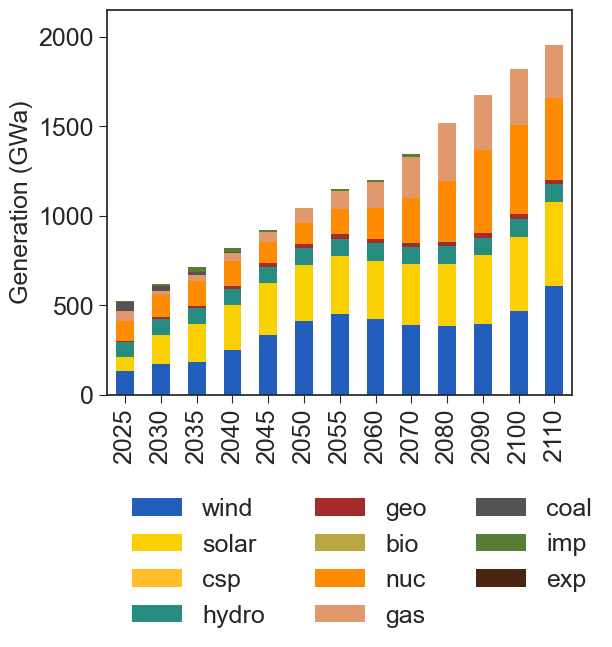

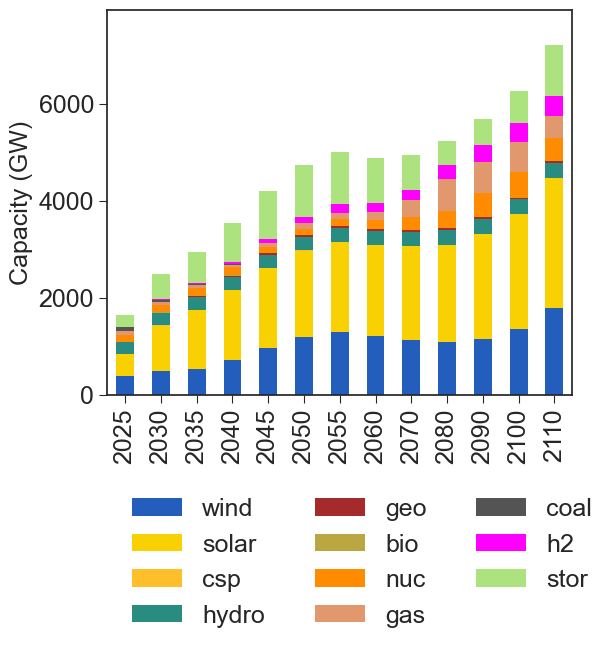

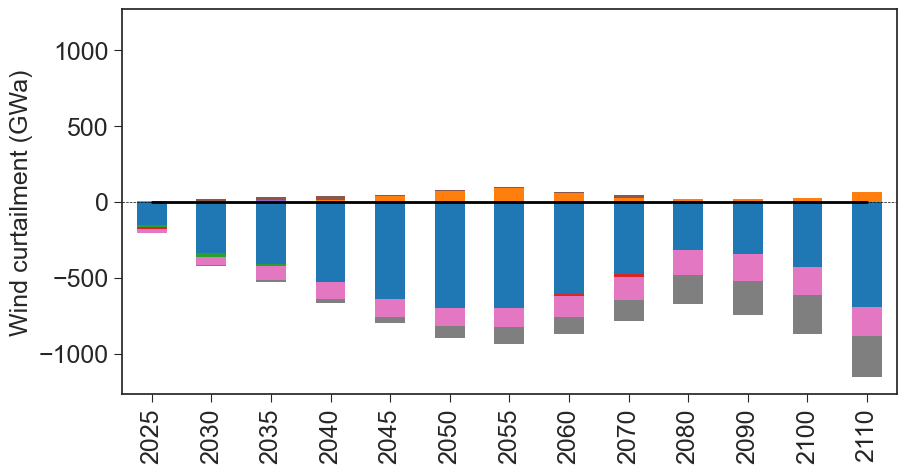

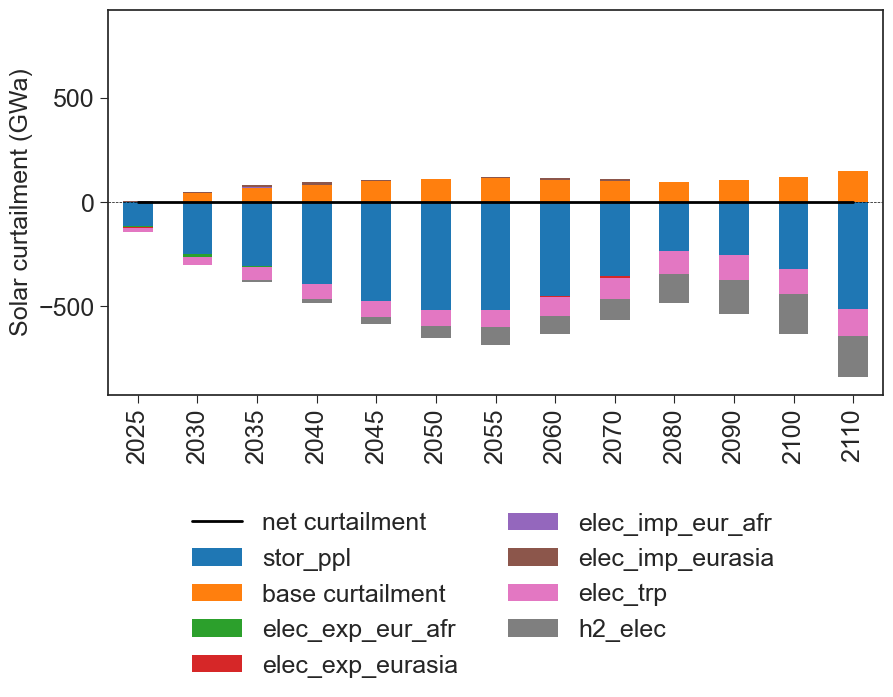

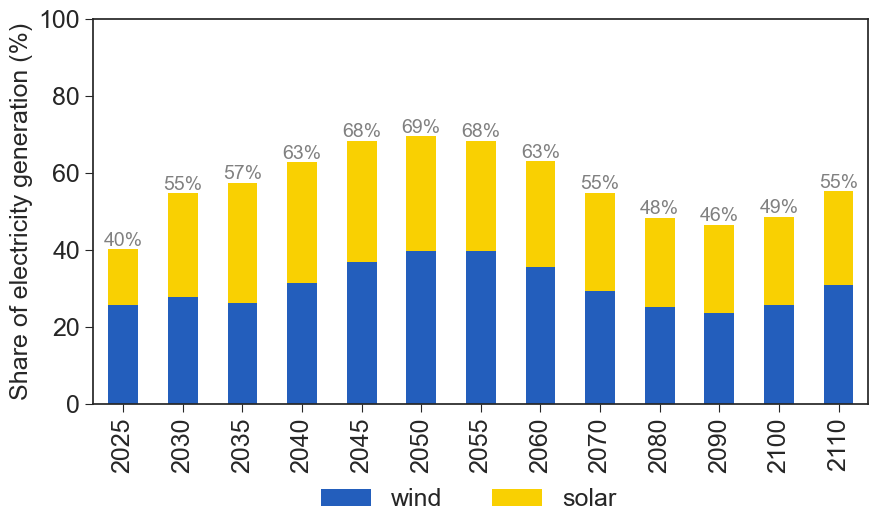

In [7]:
fig1, fig2, fig3, fig4, fig5, df_generation, df_capacity, tech_cap, tech_act, VRE_share = plot_generation_and_capacity(scen, regions, technologies, model_years, bins)

fig1.savefig("figures/generation_current_formulation.png",
                bbox_inches="tight",
                dpi=300)

fig2.savefig("figures/capacity_current_formulation.png",
                bbox_inches="tight",
                dpi=300)

fig3.savefig("figures/wind_curtailment_current_formulation.png",
                bbox_inches="tight",
                dpi=300)

fig4.savefig("figures/solar_curtailment_current_formulation.png",
                bbox_inches="tight",
                dpi=300)

fig5.savefig("figures/VRE_share_current_formulation.png",
                bbox_inches="tight",
                dpi=300)
    

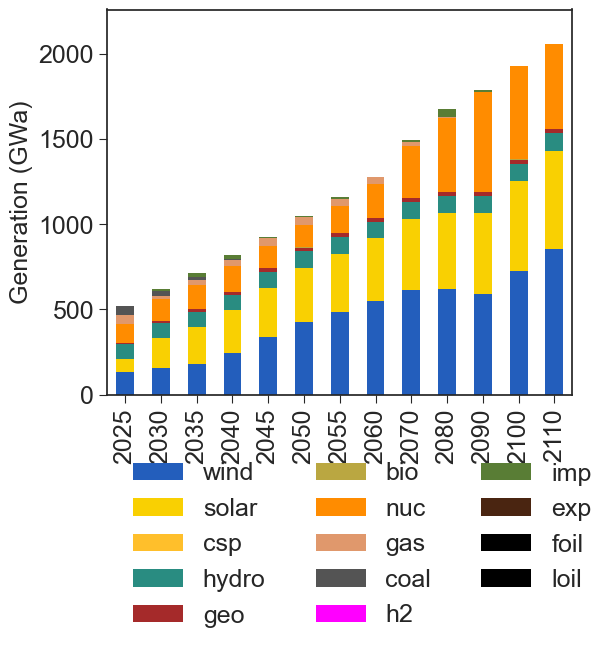

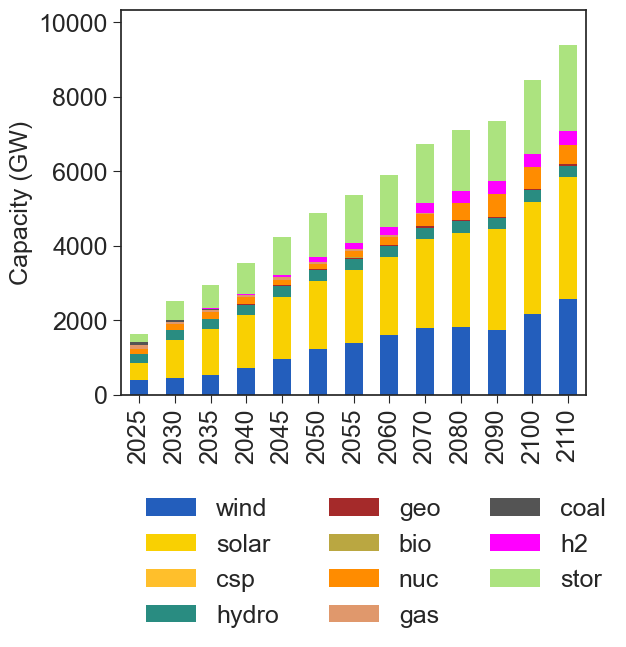

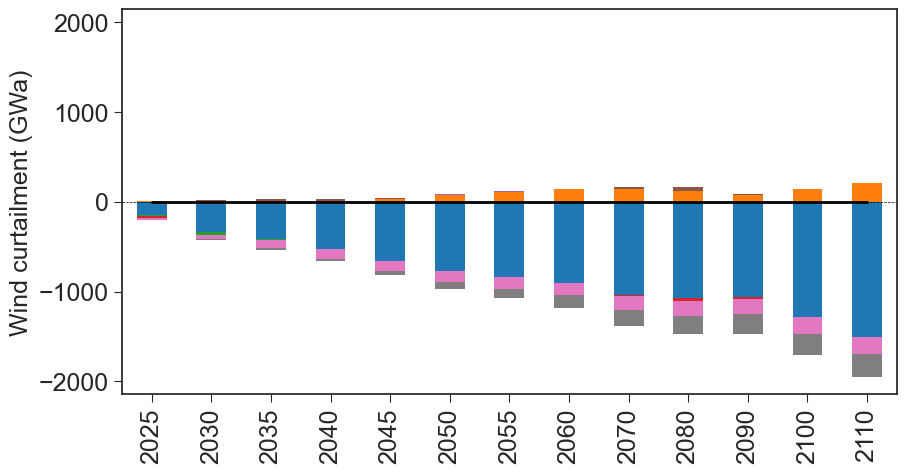

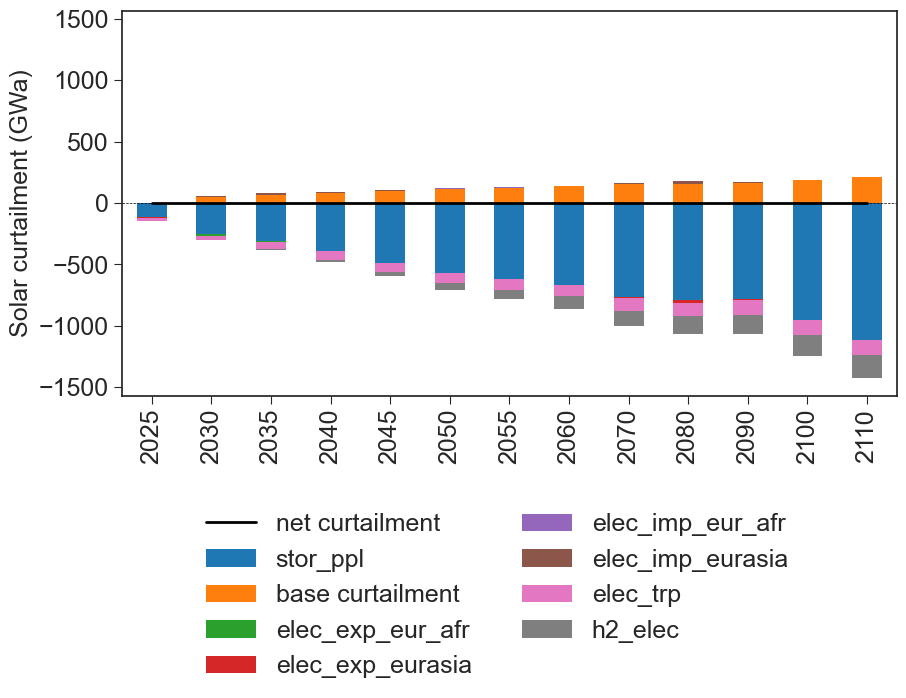

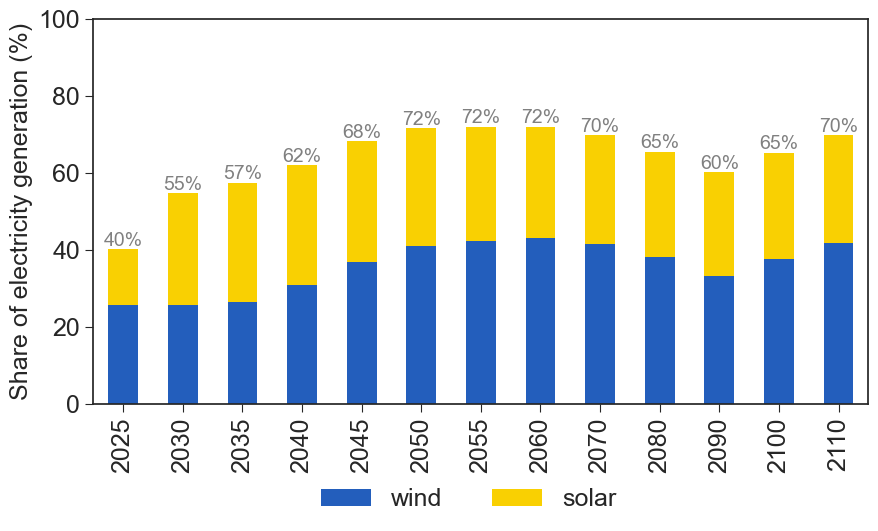

In [6]:
fig1, fig2, fig3, fig4, fig5, df_generation_adjusted, df_capacity_adjusted, tech_cap_adjusted, tech_act_adjusted, VRE_share_adjusted  = plot_generation_and_capacity(scen_adjusted, regions, technologies, model_years, bins)

fig1.savefig("figures/generation_adjusted_carbon_pricing.png",
                bbox_inches="tight",
                dpi=300)

fig2.savefig("figures/capacity_adjusted_carbon_pricing.png",
                bbox_inches="tight",
                dpi=300)

fig3.savefig("figures/wind_curtailment_adjusted_carbon_pricing.png",
                bbox_inches="tight",
                dpi=300)

fig4.savefig("figures/solar_curtailment_adjusted_carbon_pricing.png",
                bbox_inches="tight",
                dpi=300)

fig5.savefig("figures/VRE_share_adjusted_carbon_pricing.png",
                bbox_inches="tight",
                dpi=300)

df_generation_adjusted.loc[2050].to_csv("../PyPSA-Eur/generation_MESSAGE_carbon_price_retained.csv")
df_capacity_adjusted.loc[2050].to_csv("../PyPSA-Eur/capacity_MESSAGE_carbon_price_retained.csv")

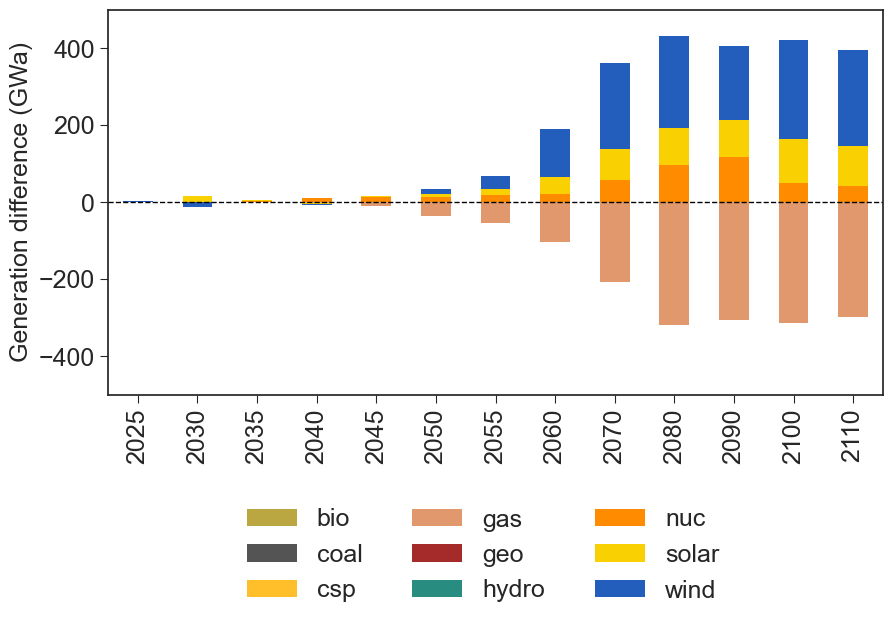

In [9]:
df_diff = (df_generation_adjusted - df_generation)
fig, ax = plt.subplots(figsize=(10,5))
df_diff.plot.bar(stacked=True, ax = ax,
                 color=[colors_dict[i] for i in df_diff.columns])

ax.set_ylabel("")
ax.axhline(0,color="k",ls="--",lw=1)
ax.set_ylim(-500,500)
ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("Generation difference (GWa)")
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.35), ncol=3, fontsize=fs)

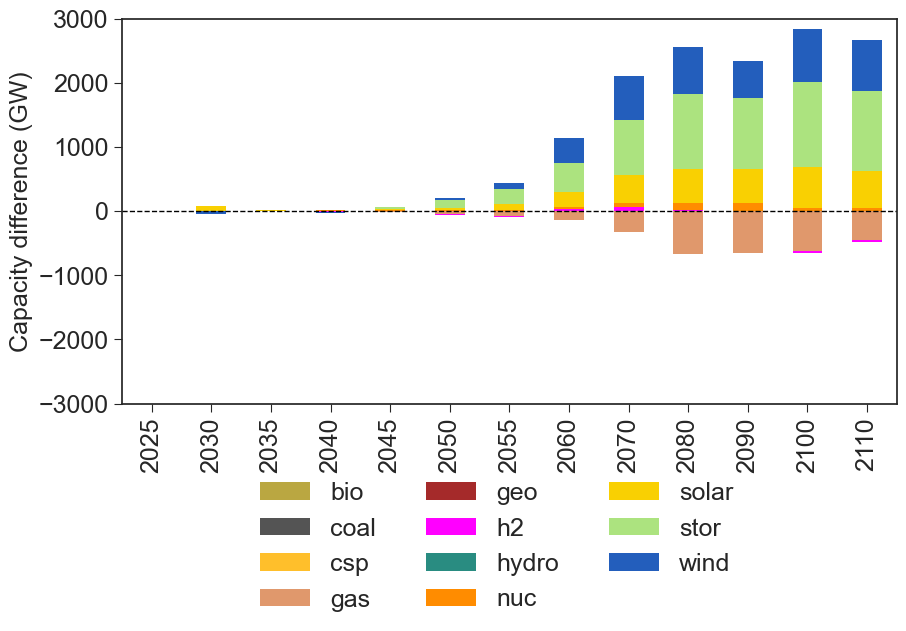

In [10]:
df_diff = (df_capacity_adjusted - df_capacity)
fig, ax = plt.subplots(figsize=(10,5))
df_diff.plot.bar(stacked=True, ax = ax,
                 color=[colors_dict[i] for i in df_diff.columns])

ax.set_ylabel("")
ax.axhline(0,color="k",ls="--",lw=1)
ax.set_ylim(-3000,3000)
ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("Capacity difference (GW)")
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.35), ncol=3, fontsize=fs)

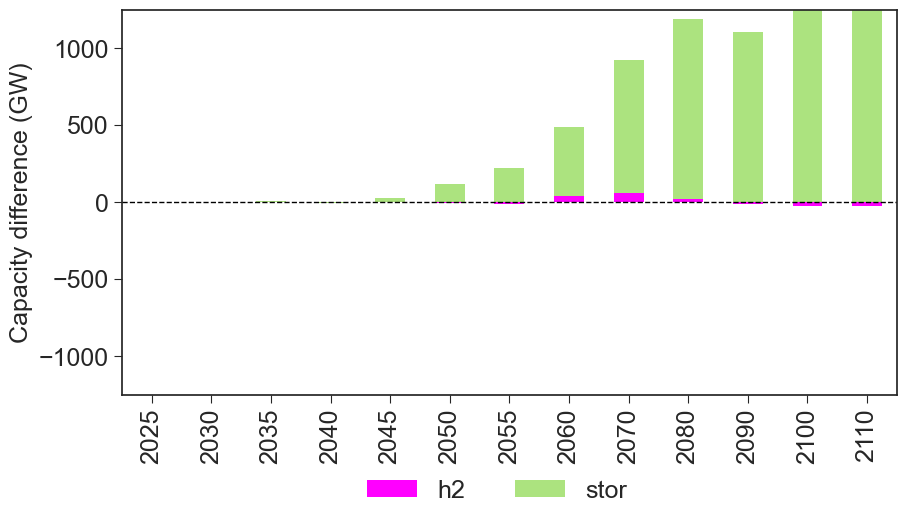

In [11]:
df_diff = (tech_cap_adjusted - tech_cap)
df_diff = df_diff.unstack().T
df_diff.rename(columns={"h2_elec":"h2","stor_ppl":"stor"},inplace=True)
fig, ax = plt.subplots(figsize=(10,5))
df_diff.plot.bar(stacked=True, ax = ax,
                 color=[colors_dict[i] for i in df_diff.columns])

ax.set_ylabel("")
ax.axhline(0,color="k",ls="--",lw=1)
ax.set_ylim(-1250,1250)
ax.legend().remove()
ax.set_xlabel("")
ax.set_ylabel("Capacity difference (GW)")
fig.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=fs)

# Sensitivity to constraints

In [12]:
scen_all_included = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500",version=1)
scen_zero_curtailment = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_zero_curtail")
scen_slack_firm_capacity = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_100p_capacity_value")
scen_zero_integration_cost = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_zero_integration_cost")
scen_all_removed = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_zero_vre_integration_constraints")
scen_wo_IC_C = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_removing_IC_and_curtailment")
scen_wo_IC_wC = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_integration_costs_and_wind_curtailment")
scen_wo_IC_sC = message_ix.Scenario(mp, model="MESSAGEix-GLOBIOM", scenario="ENGAGE_SSP2_EN_NPi2020_500_integration_costs_and_solar_curtailment")

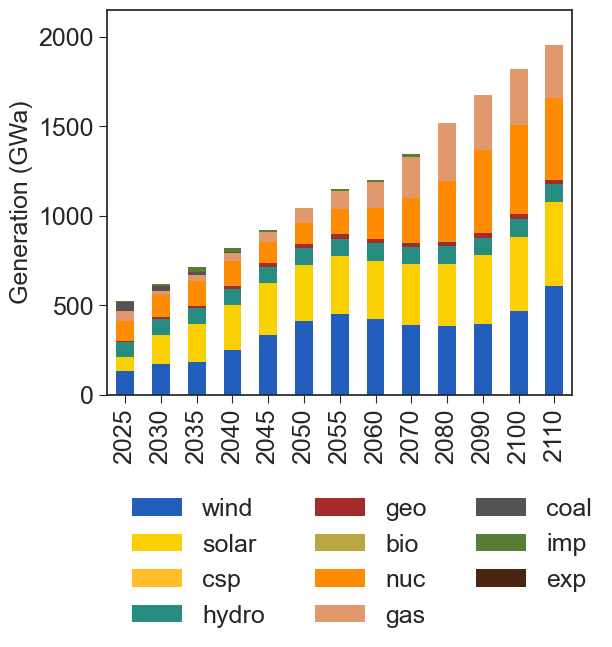

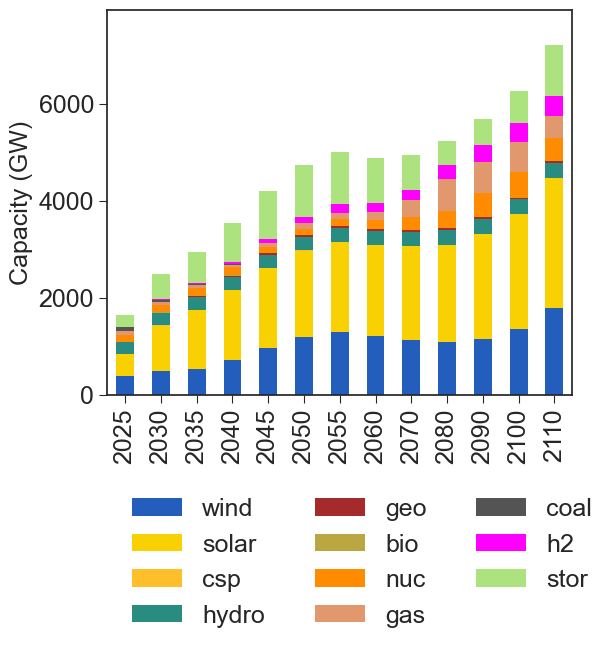

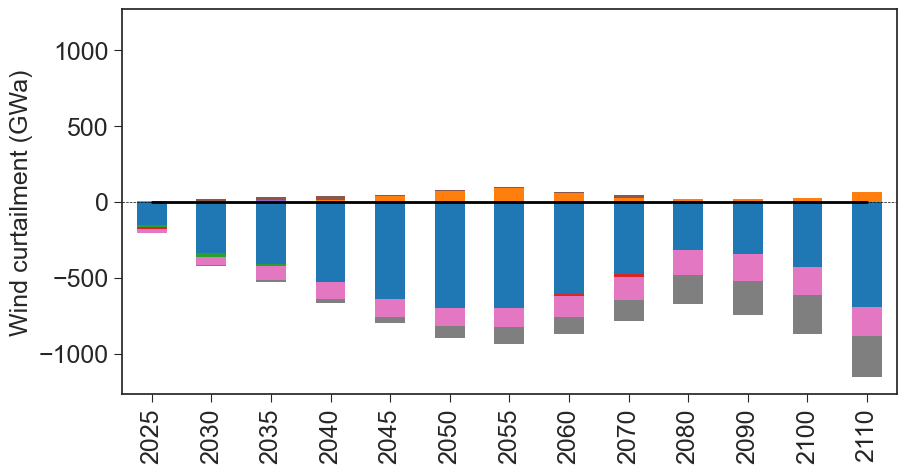

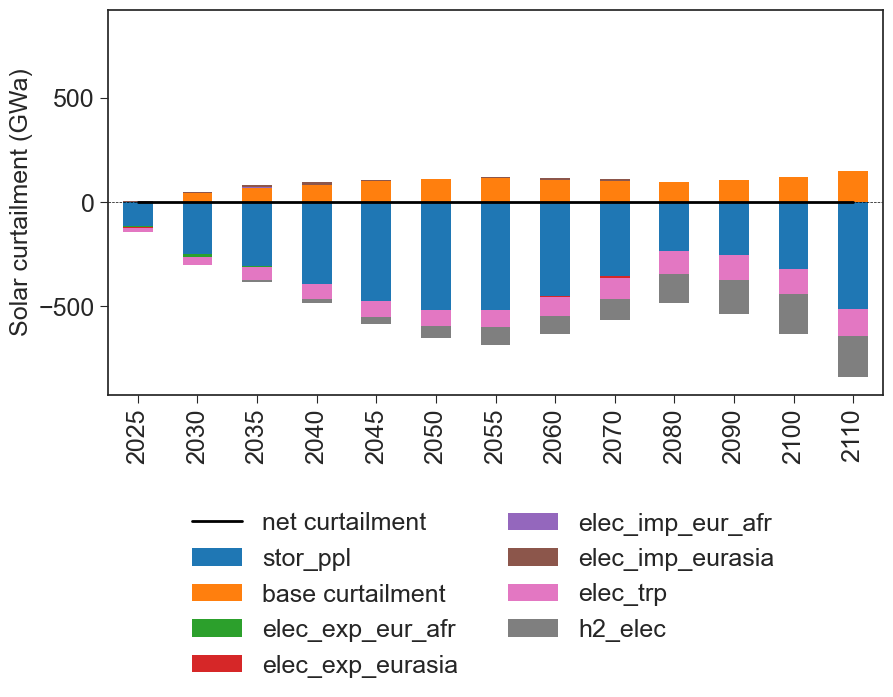

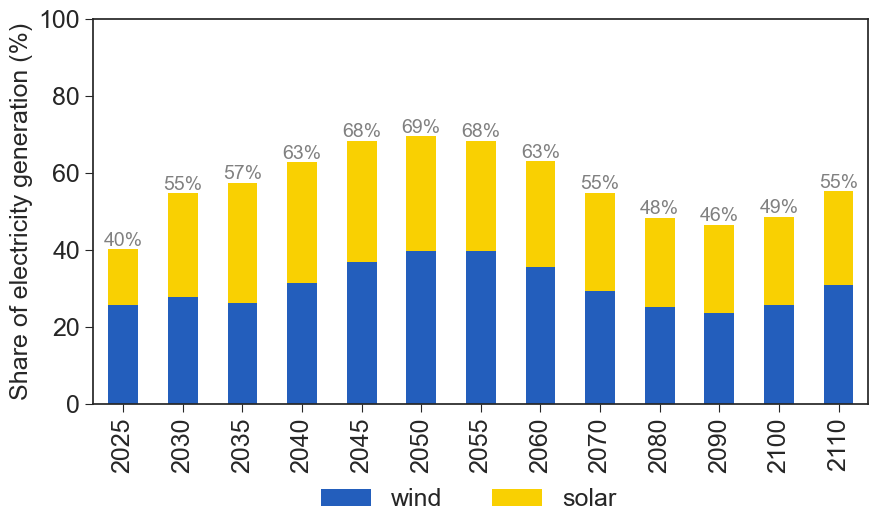

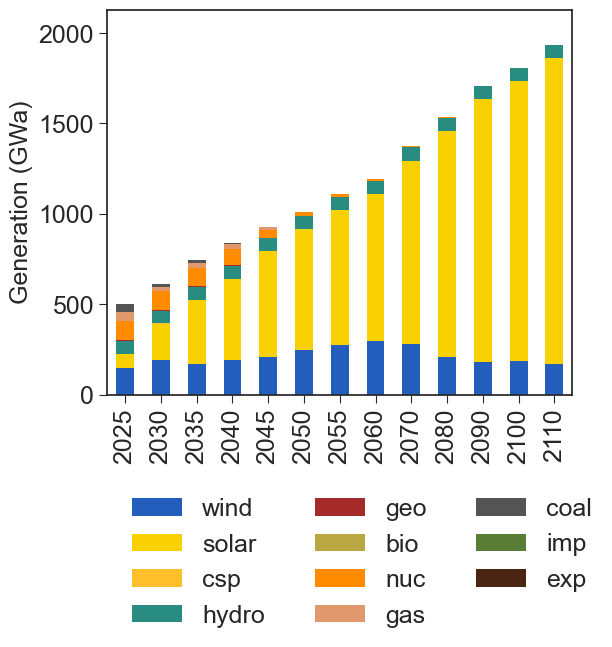

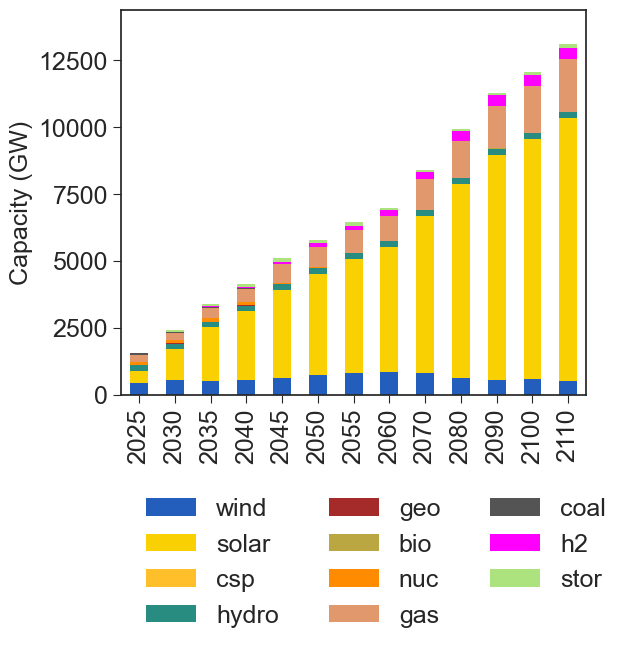

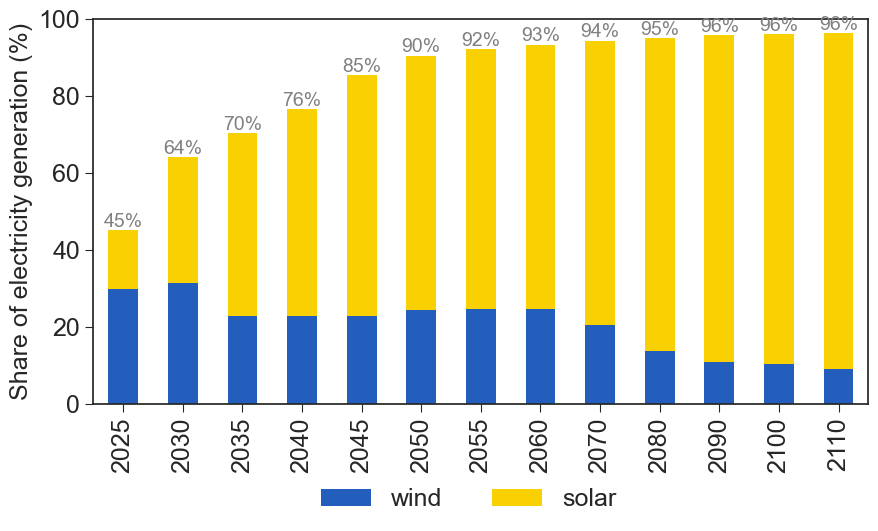

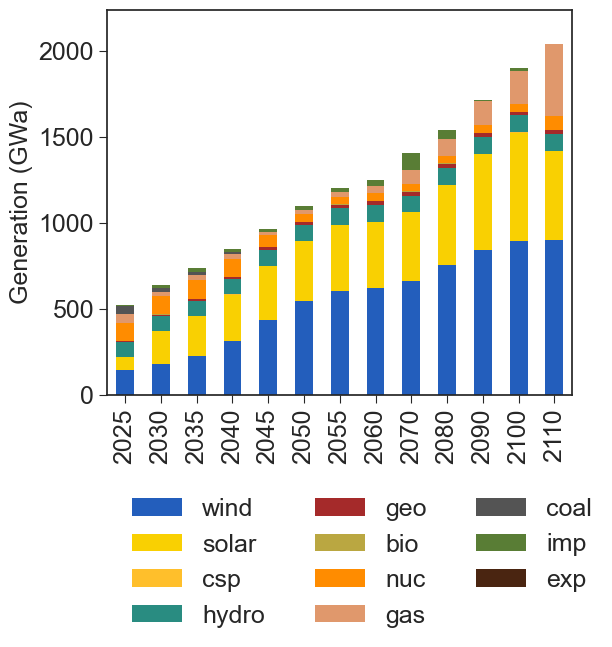

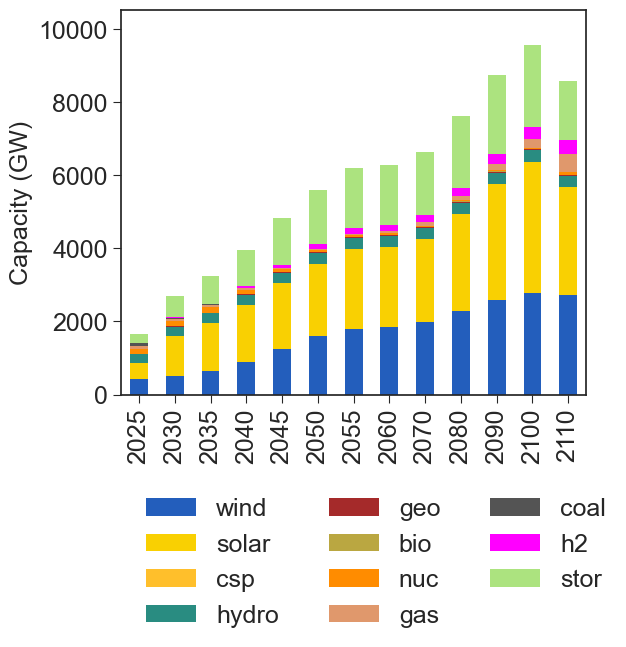

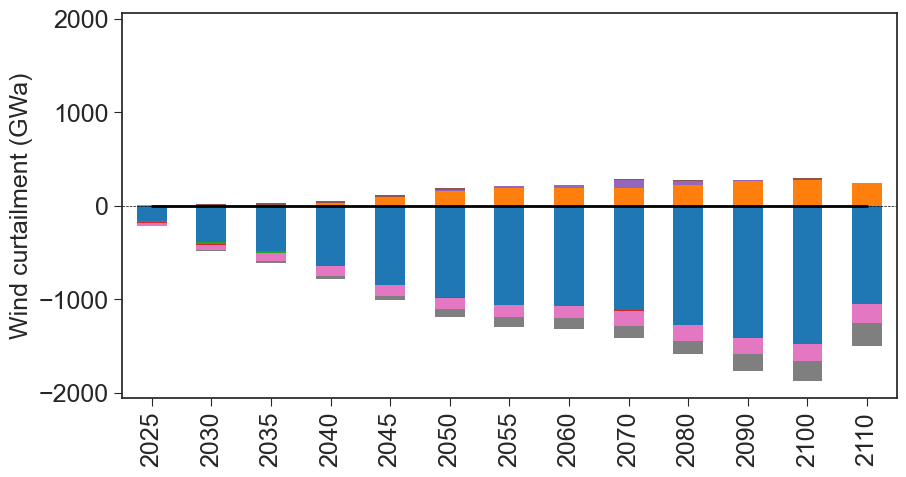

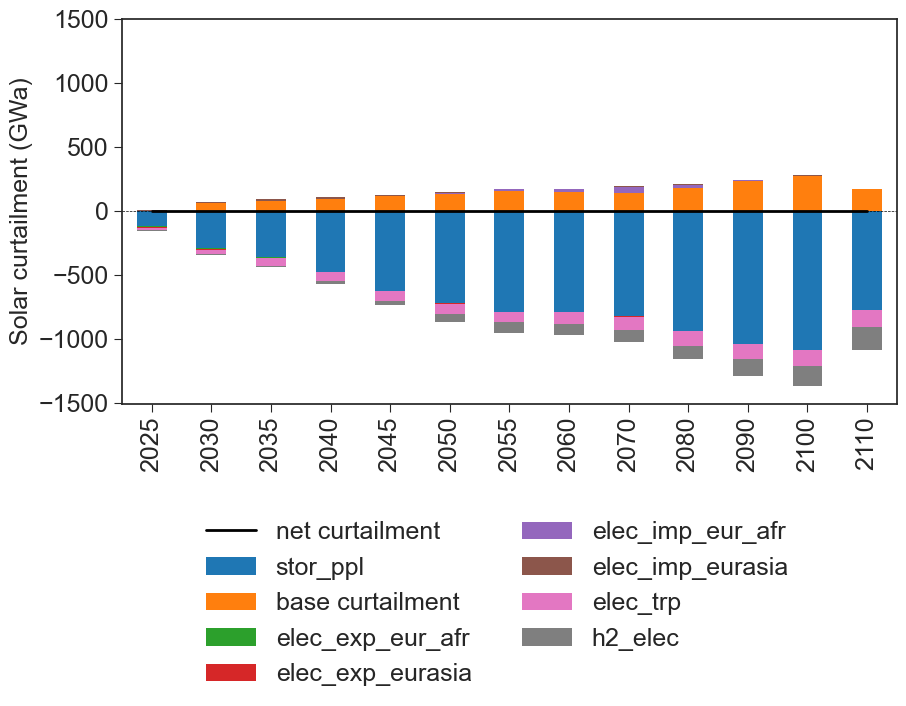

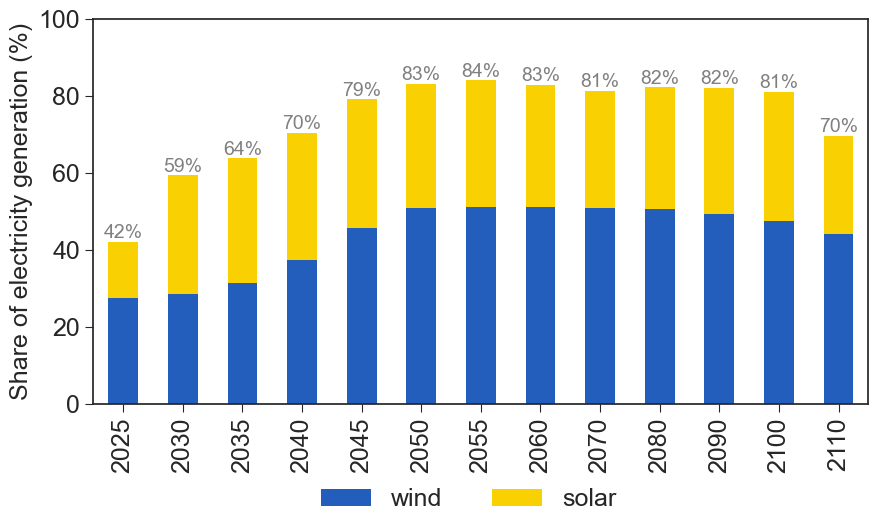

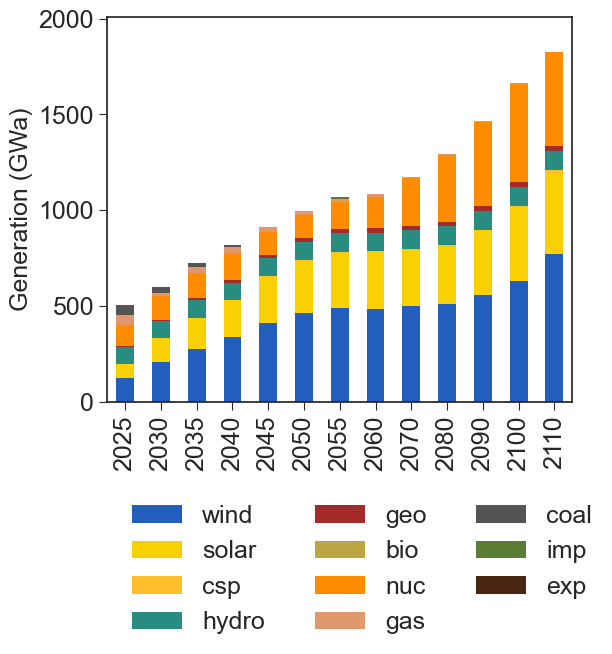

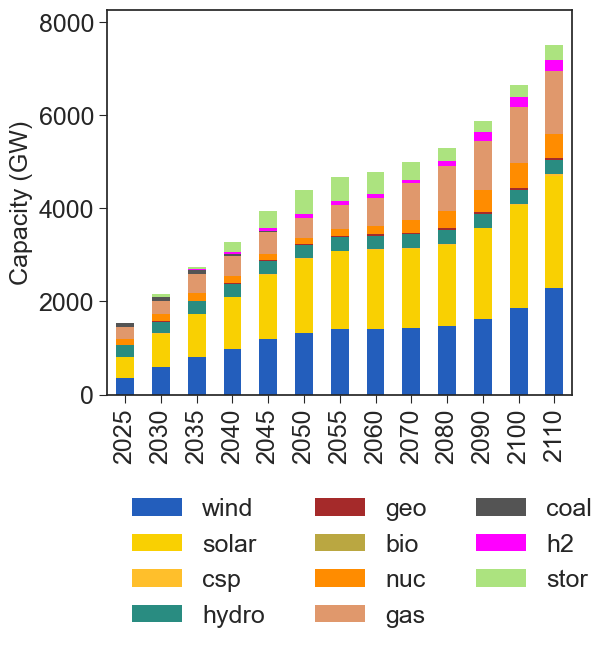

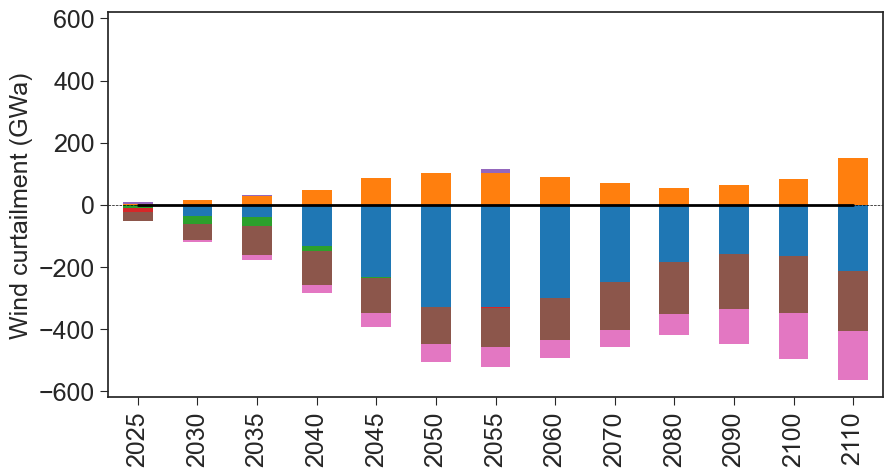

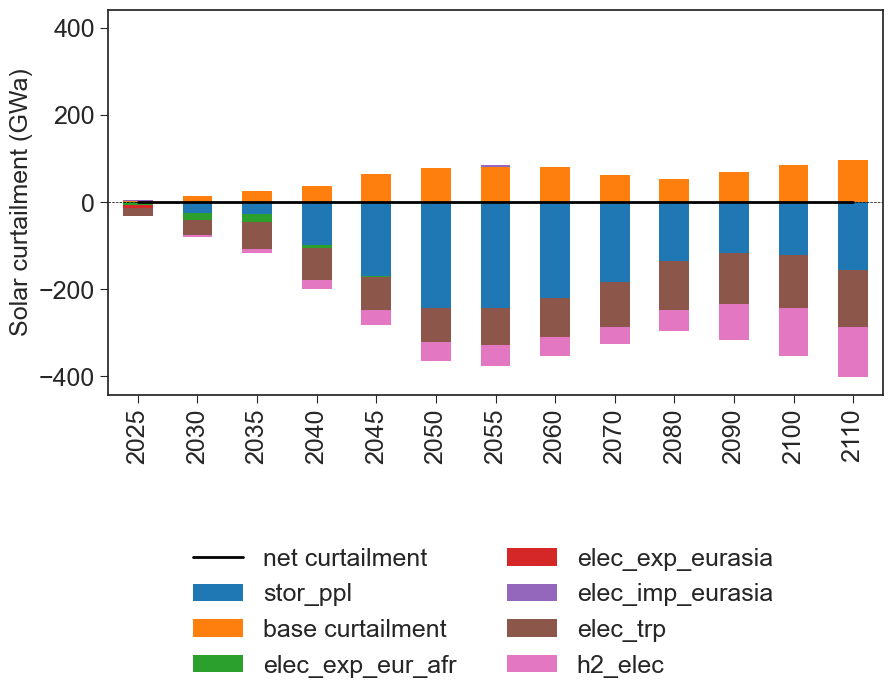

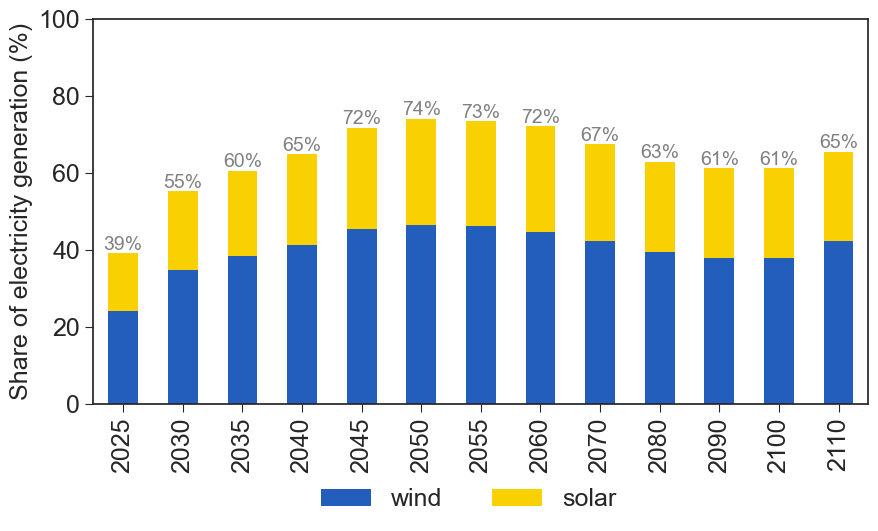

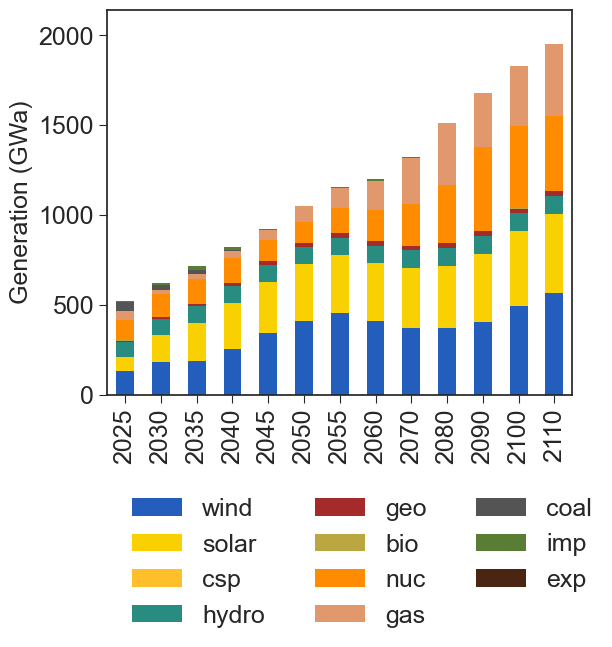

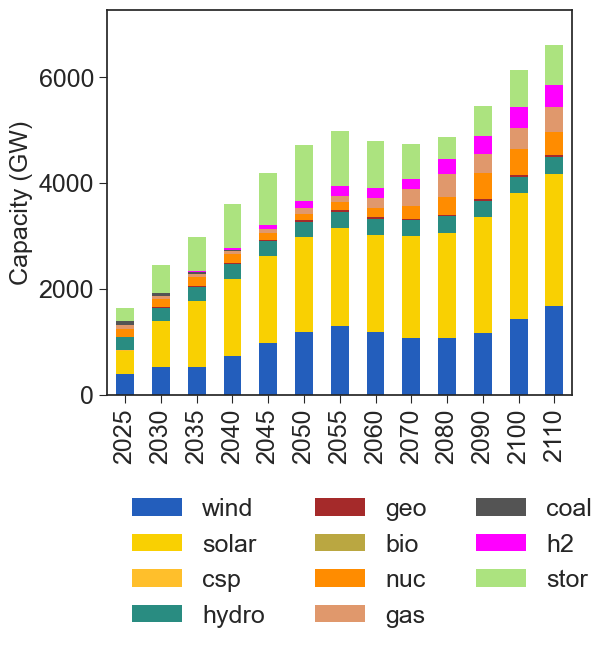

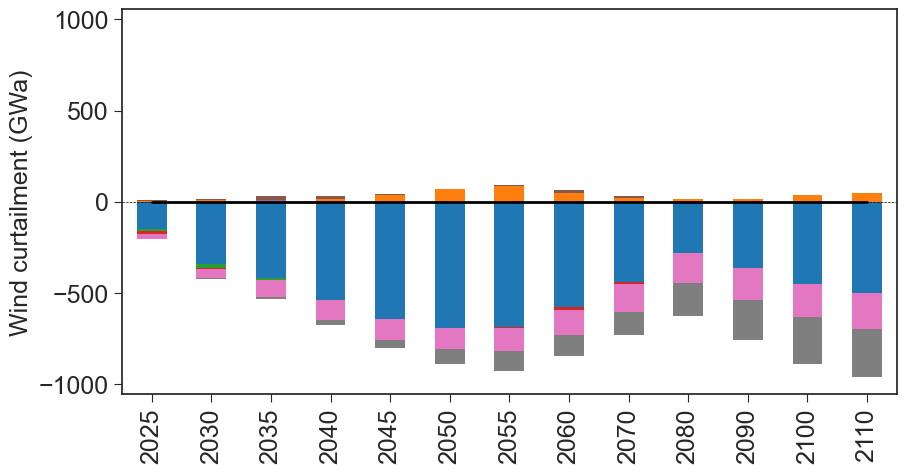

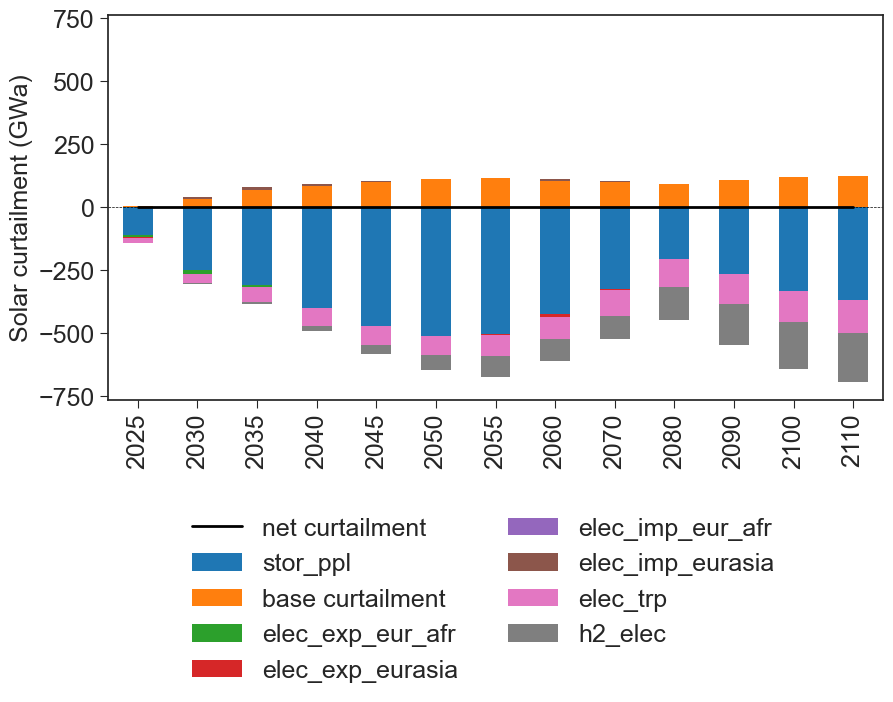

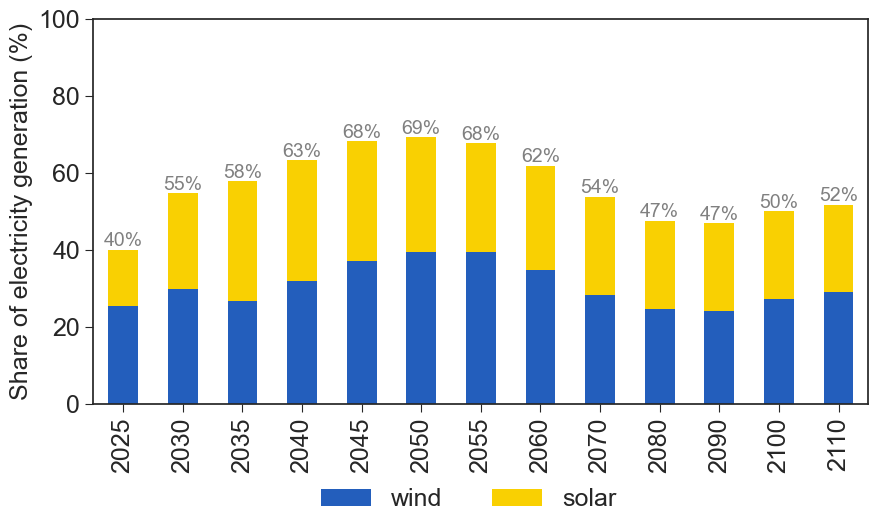

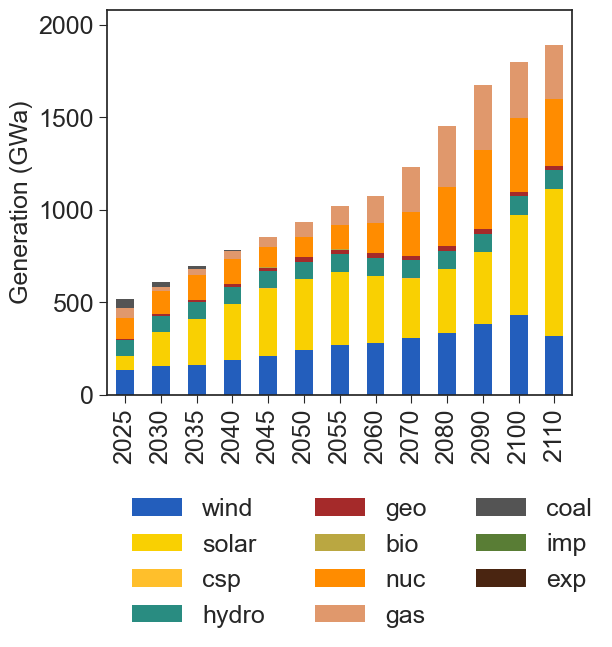

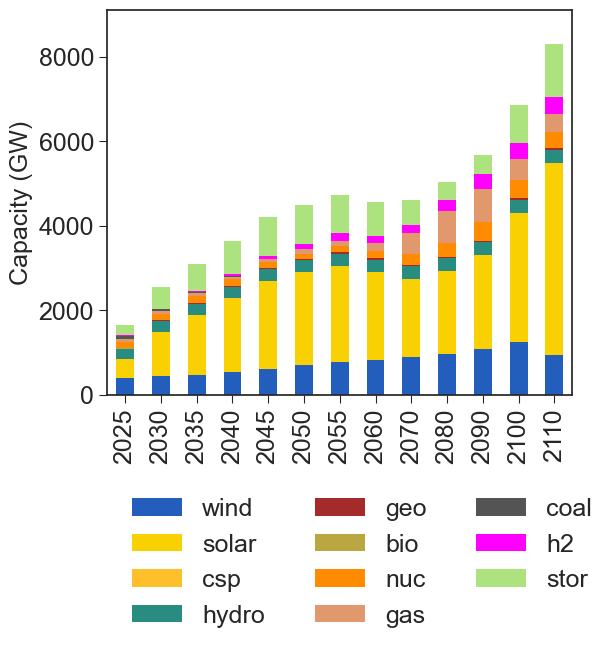

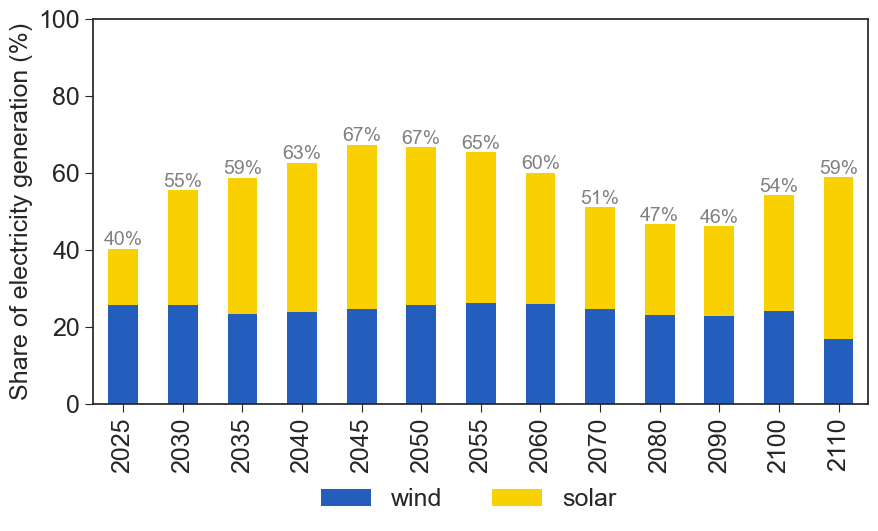

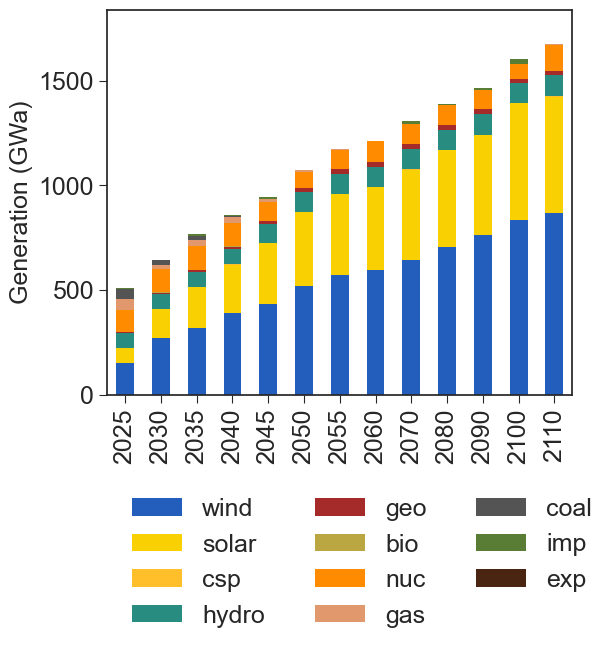

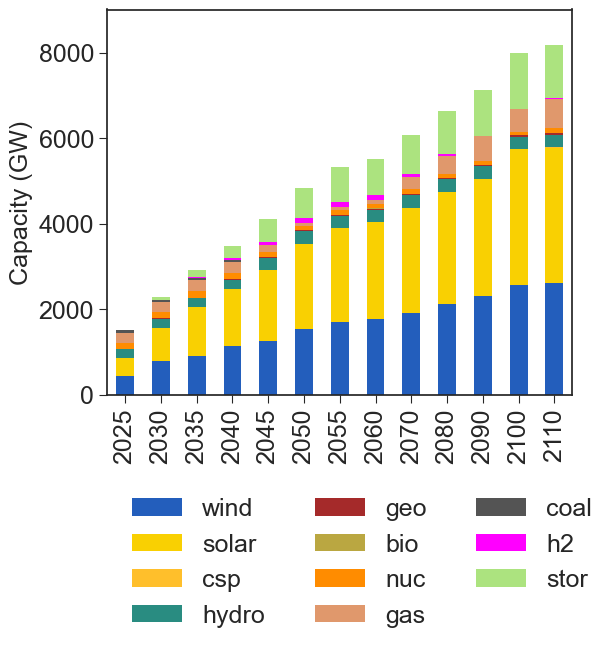

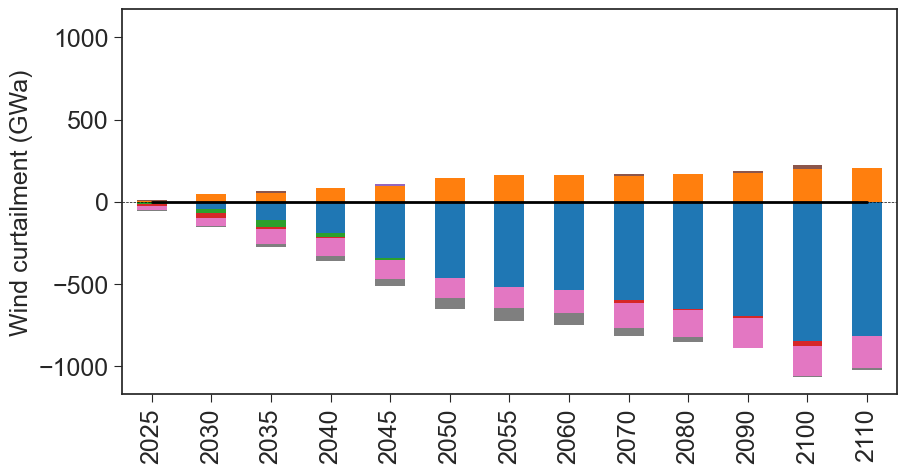

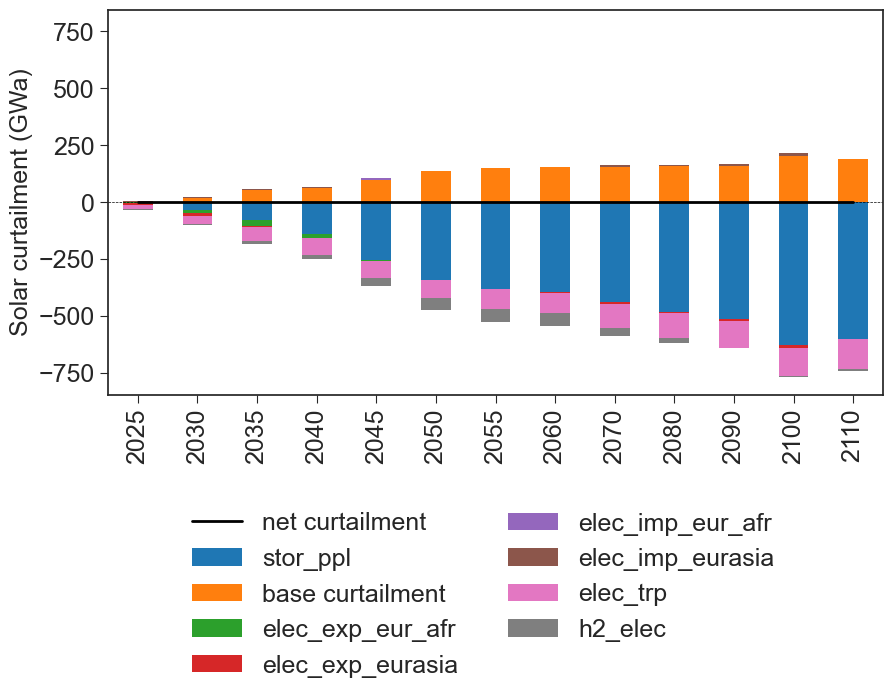

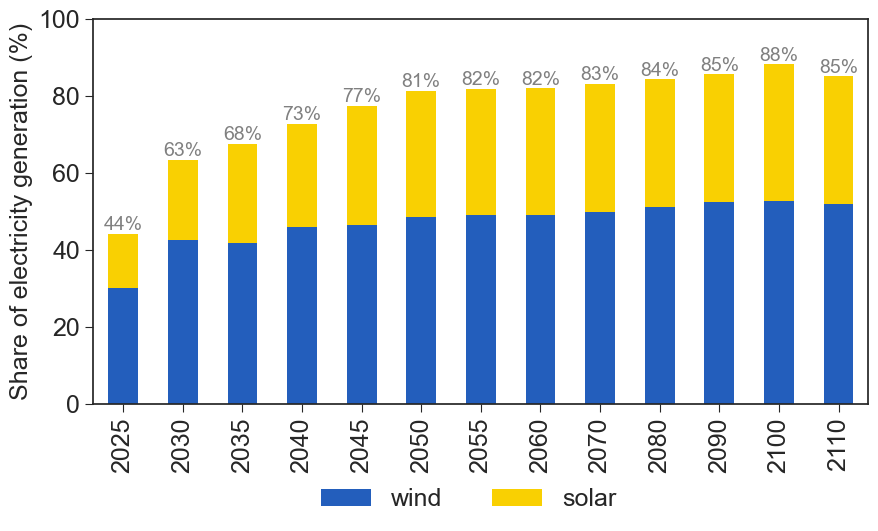

In [13]:
fig1, fig2, fig3, fig4, fig5, df_generation, df_capacity, tech_cap, tech_act, VRE_share  = plot_generation_and_capacity(sc_ref, regions, technologies, model_years, bins, plot=True)
fig1_all, fig2, fig3, fig4, fig5, df_generation_all, df_capacity_all, tech_cap, tech_act, VRE_share_all  = plot_generation_and_capacity(scen_all_removed, regions, technologies, model_years, bins, plot=True, curtailment=False)
fig1_IC, fig2, fig3, fig4, fig5, df_generation_IC, df_capacity_IC, tech_cap, tech_act, VRE_share_IC  = plot_generation_and_capacity(scen_zero_integration_cost, regions, technologies, model_years, bins, plot=True)
fig1_Flex, fig2, fig3, fig4, fig5, df_generation_Flex, df_capacity_Flex, tech_cap, tech_act, VRE_share_Flex  = plot_generation_and_capacity(scen_slack_flexibility, regions, technologies, model_years, bins, plot=True)
fig1_Firm, fig2, fig3, fig4, fig5, df_generation_Firm, df_capacity_Firm, tech_cap, tech_act, VRE_share_Firm  = plot_generation_and_capacity(scen_slack_firm_capacity, regions, technologies, model_years, bins, plot=True)
fig1_curt, fig2, fig3, fig4, fig5, df_generation_curt, df_capacity_curt, tech_cap, tech_act, VRE_share_curt  = plot_generation_and_capacity(scen_zero_curtailment, regions, technologies, model_years, bins, plot=True, curtailment=False)
fig1, fig2, fig3, fig4, fig5, df_generation_w_curt, df_capacity_w_curt, tech_cap, tech_act, VRE_share_w_curt  = plot_generation_and_capacity(scen_wo_all_but_curtailment, regions, technologies, model_years, bins, plot=True)

In [30]:
df_generation_w_curt.loc[2050].to_csv("../PyPSA-Eur/generation_MESSAGE_only_curt.csv")
df_capacity_w_curt.loc[2050].to_csv("../PyPSA-Eur/capacity_MESSAGE_only_curt.csv")

In [14]:
fs = 12
plt.style.use('seaborn-ticks')
plt.rcParams['axes.labelsize'] = fs
plt.rcParams['xtick.labelsize'] = fs
plt.rcParams['ytick.labelsize'] = fs
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['axes.axisbelow'] = True

In [25]:
def plot_constraint_sensitivity(plot_dict, ylabel, relative = False, annotate=False):

    fig, ax = plt.subplots(figsize=(9,11),
                            sharex=True,
                            sharey=True,
                            ncols=2,
                            nrows=3)
    axes = ax.flatten()
    fig.subplots_adjust(hspace=0.1, wspace=0.05)
    preferred_order = pd.Index(["wind","solar","csp","hydro",
                                "geo","bio","nuc",
                                "gas","coal",
                                "h2","stor","LDES","SDES"])
    ii = 0
    for i in plot_dict.keys():

        df_plot = plot_dict[i] - plot_dict["Reference"] if relative else plot_dict[i]

        new_columns = preferred_order.intersection(df_plot.columns).append(
                                                    df_plot.columns.difference(preferred_order)
                                                    )

        df_plot[new_columns].plot(kind="bar", 
                                    stacked=True, 
                                    ax=axes[ii], 
                                    color=[colors_dict[k] for k in new_columns])
        
        if ii > 0:
            step_function = plot_dict["Reference"].sum(axis=1).values
            step_function_x = list(np.arange(len(step_function)))
            # add dummy values at the beginning and end of the step function
            step_function = plot_dict["Reference"].sum(axis=1).values
            # add dummy values at the beginning and end of the step function
            step_function = np.insert(step_function, 0, step_function[0])
            step_function = np.insert(step_function, len(step_function), step_function[-1])
            
            step_function_x = [-0.5] + step_function_x + [len(step_function_x)-0.5]

            if not relative:
                axes[ii].step(step_function_x,step_function, color="black", linestyle="dashed", label="reference", where='mid')
            # else:
        
        axes[ii].axhline(0,color="black", lw=1)

        axes[ii].legend().remove()
        axes[ii].set_title(i, fontsize=fs-2, pad=-5)

        if annotate and not relative:
            for k in range(len(df_plot.index)):
                axes[ii].text(k, df_plot.iloc[k].sum(), str(int(round(df_plot.iloc[k].sum(),0))) + "%", ha="center", va="bottom", fontsize=fs-4
                        , color="grey")

        ii += 1

    ax[0,0].set_ylabel(ylabel)
    ax[1,0].set_ylabel(ylabel)
    ax[2,0].set_ylabel(ylabel)
    ax[2,0].set_xlabel("")
    ax[2,1].set_xlabel("")

    # rotate xtick labels 90 degrees
    for tick in ax[2,0].get_xticklabels():
        tick.set_rotation(45)

    for tick in ax[2,1].get_xticklabels():
        tick.set_rotation(45)
        
    # only include legend labels for the first subplot
    handles, labels = ax[0,1].get_legend_handles_labels()
    if len(handles) > 3:
        leg_yloc = -0.075
    else:
        leg_yloc = 0
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, leg_yloc), ncol=3, frameon=True, fontsize=fs)
            
    return fig

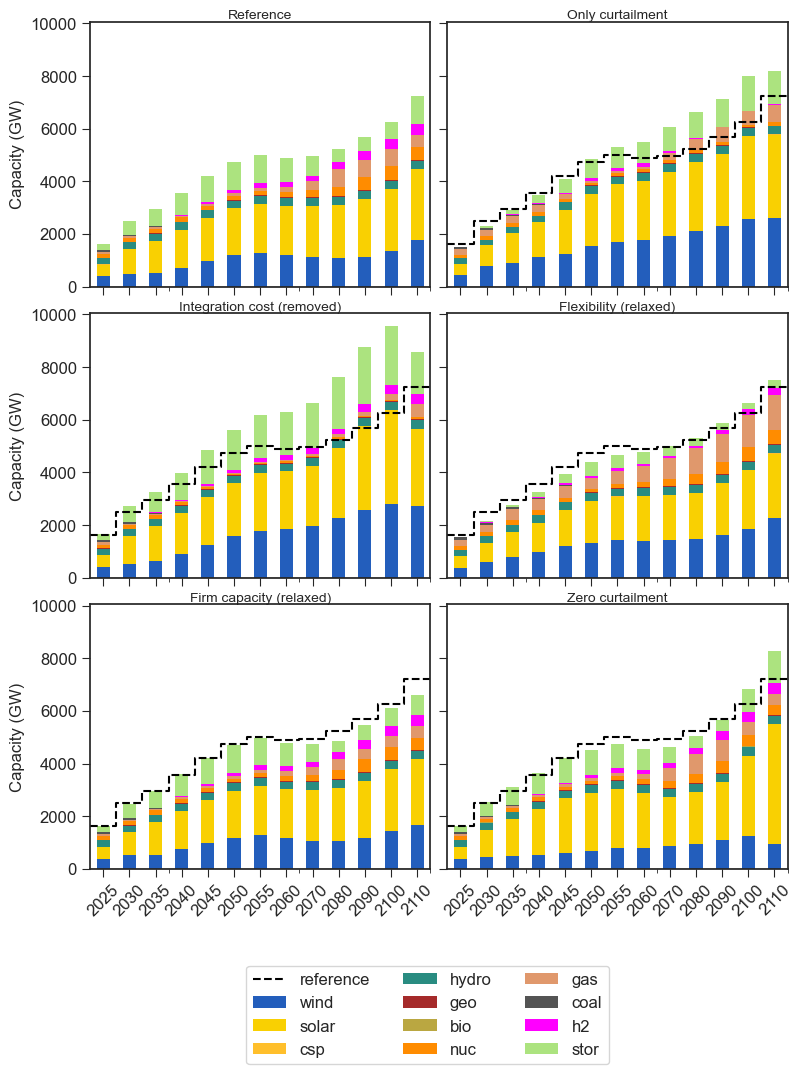

In [26]:
ylabel = "Capacity (GW)"

plot_dict = {"Reference":df_capacity,
            # "All constraints removed":df_capacity_all,
            "Only curtailment":df_capacity_w_curt,
            "Integration cost (removed)":df_capacity_IC,
            "Flexibility (relaxed)":df_capacity_Flex,
            "Firm capacity (relaxed)":df_capacity_Firm,
            "Zero curtailment":df_capacity_curt,
            }

fig = plot_constraint_sensitivity(plot_dict, ylabel)
fig.savefig("figures/MESSAGE_constraints_sensitivity_capacity.png",
            bbox_inches="tight",
            dpi=300)

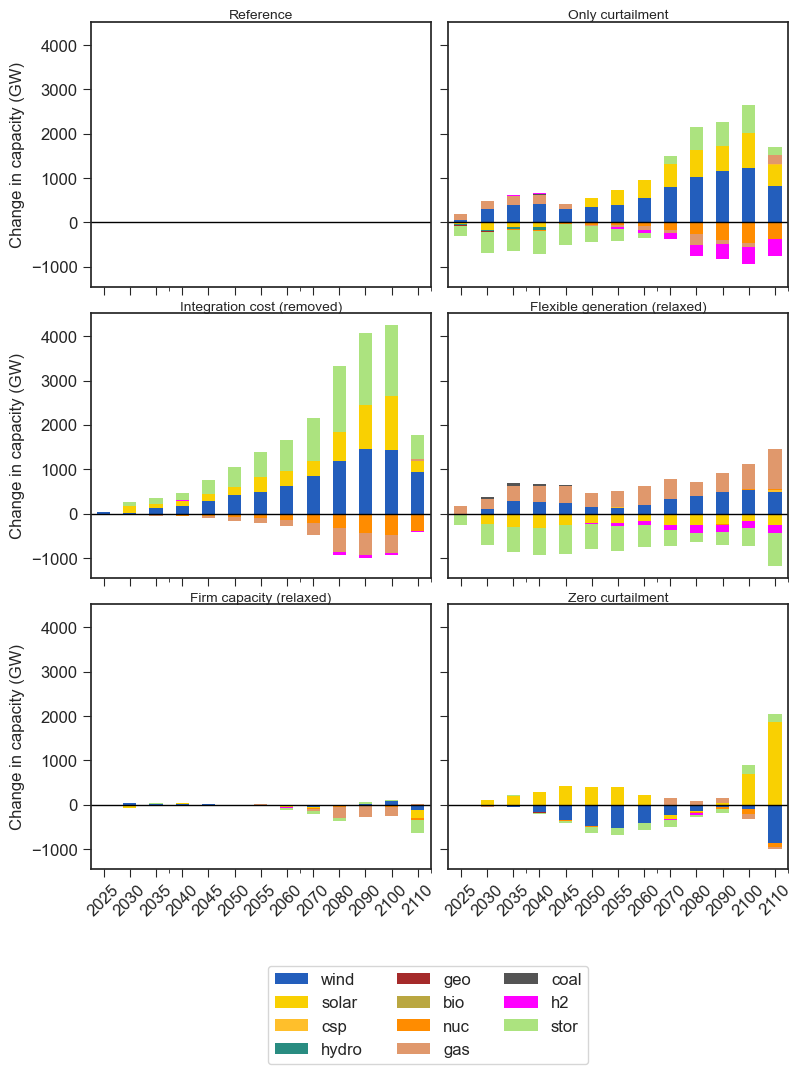

In [27]:
ylabel = "Change in capacity (GW)"

plot_dict = {"Reference":df_capacity,
             "Only curtailment":df_capacity_w_curt,
            # "All constraints removed":df_capacity_all,
            "Integration cost (removed)":df_capacity_IC,
            "Flexible generation (relaxed)":df_capacity_Flex,
            "Firm capacity (relaxed)":df_capacity_Firm,
            "Zero curtailment":df_capacity_curt,
            }

fig = plot_constraint_sensitivity(plot_dict, ylabel, relative = True)
fig.savefig("figures/MESSAGE_constraints_sensitivity_capacity_change.png",
            bbox_inches="tight",
            dpi=300)

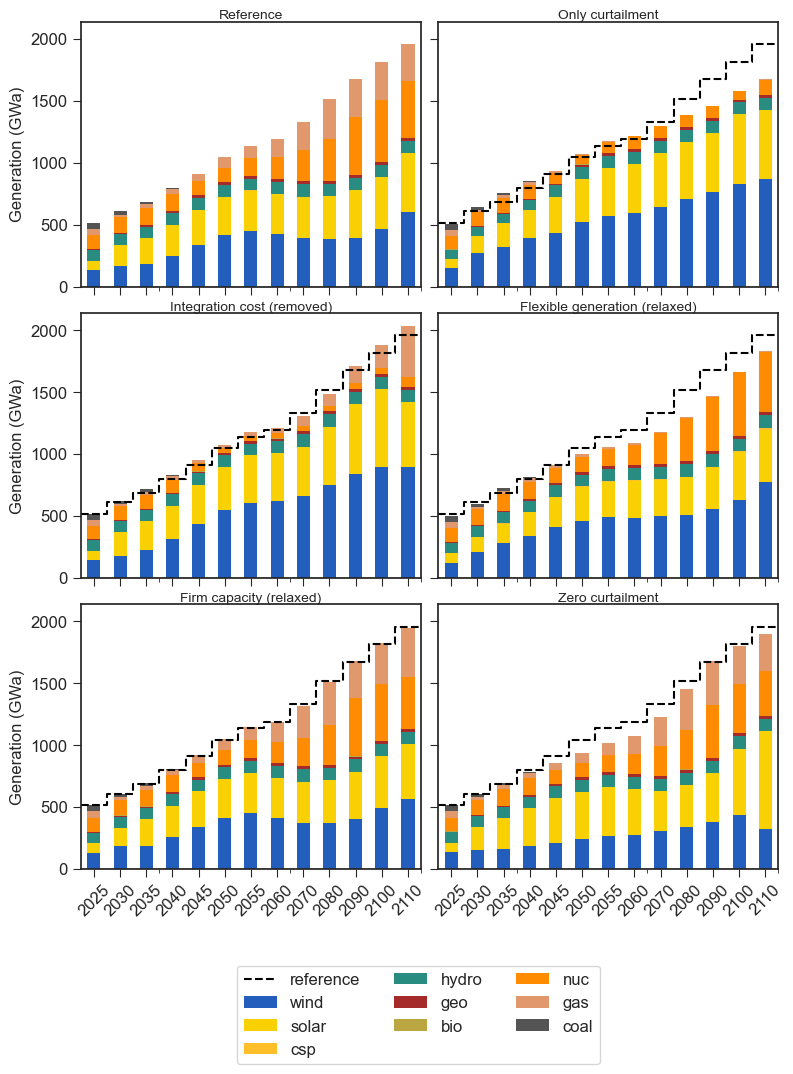

In [28]:
ylabel = "Generation (GWa)"

plot_dict = {"Reference":df_generation,
            #  "All constraints removed":df_generation_all,
             "Only curtailment": df_generation_w_curt,
             "Integration cost (removed)":df_generation_IC,
             "Flexible generation (relaxed)":df_generation_Flex,
             "Firm capacity (relaxed)":df_generation_Firm,
             "Zero curtailment":df_generation_curt,}

fig = plot_constraint_sensitivity(plot_dict, ylabel)
fig.savefig("figures/MESSAGE_constraints_sensitivity_generation.png",
            bbox_inches="tight",
            dpi=300)

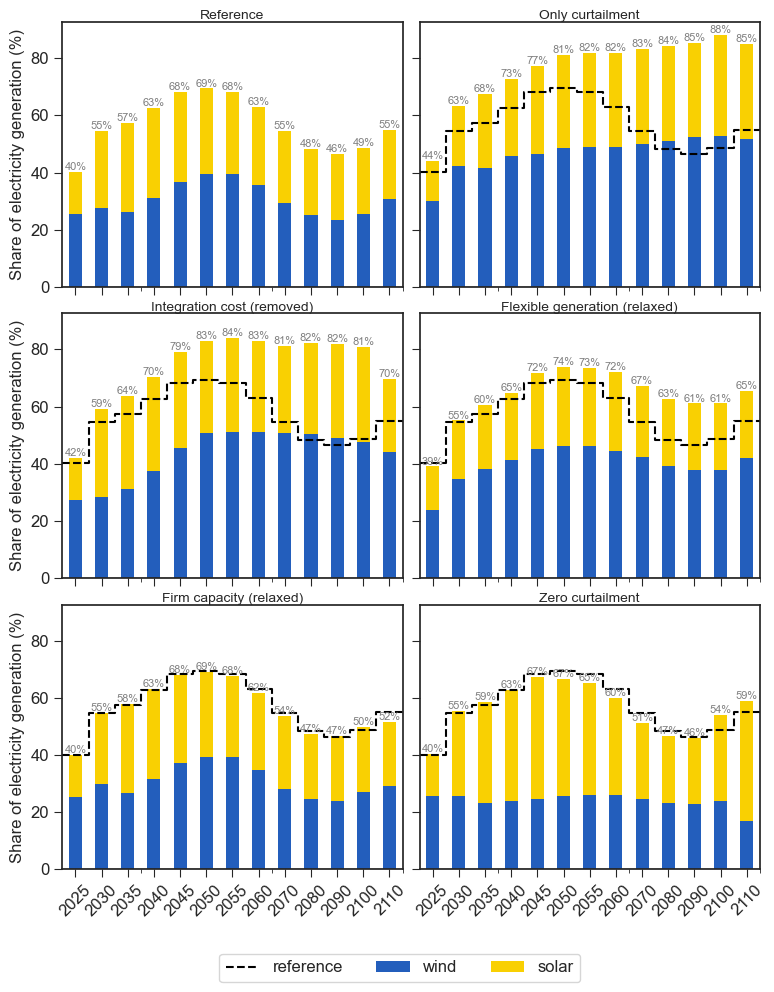

In [29]:
ylabel = "Share of electricity generation (%)"

plot_dict = {"Reference":VRE_share,
            # "All constraints removed":VRE_share_all,
            "Only curtailment":VRE_share_w_curt,
            "Integration cost (removed)":VRE_share_IC,
            "Flexible generation (relaxed)":VRE_share_Flex,
            "Firm capacity (relaxed)":VRE_share_Firm,
            "Zero curtailment":VRE_share_curt,}

fig = plot_constraint_sensitivity(plot_dict, ylabel, annotate=True)
fig.savefig("figures/MESSAGE_constraints_sensitivity_vre_share.png",
            bbox_inches="tight",
            dpi=300)

In [7]:
mp.close_db()